# Hands-on exercise - Luca Menti - Physics of Data 

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [103]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open("km_year_power_price.csv", newline=''), delimiter=',')

# your code
#usefull library
import pandas as pd

# I create a dataframe with all the data
df = pd.read_csv('km_year_power_price.csv')
df

,km,year,powerPS,avgPrice
0,125000,2001,40,1371.11
1,150000,2001,40,1298.70
2,5000,2001,60,1232.43
3,50000,2001,60,1733.89
4,60000,2001,60,1985.24
...,...,...,...,...
1292,5000,2015,260,45277.18
1293,10000,2015,260,54156.28
1294,20000,2015,260,49492.38
1295,10000,2015,300,38542.69


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




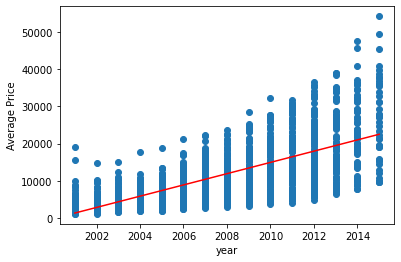

The price increased year by year is: 1509.093825335221 , The error is: 45.625811824073175
The correlation coefficient is: 0.6767043169095441


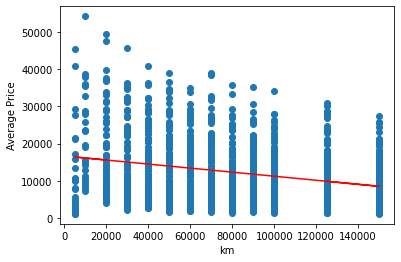

The price increased  as km increases is: -0.054251513309725684 , The error is: 0.005662227565052593
The correlation coefficient is: -0.25728674299884985


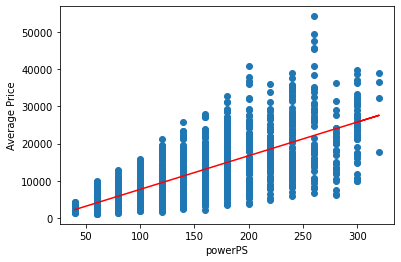

The price increased  as powerPS increases is: 90.33080718820231 , The error is: 2.499921328930258
The correlation coefficient is: 0.708550031526397


In [129]:
# linear regression with linregress (estimate price from year)

# your code.....

# YEAR VS AVGPRICE
x= df[["year"]]
y=df[["avgPrice"]]


x=x.values
y=y.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:,0], y[:,0])

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.xlabel("year")
plt.ylabel("Average Price")
plt.plot(x, mymodel,color="red")
plt.show()


print( "The price increased year by year is:", slope, ", The error is:", std_err )

print( "The correlation coefficient is:", r_value )

# KM VS AVGPRICE
x1= df[["km"]]
y1=df[["avgPrice"]]

x1=x1.values
y1=y1.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x1[:,0], y1[:,0])

def myfunc(x1):
    return slope * x1 + intercept

mymodel = list(map(myfunc, x1))

plt.scatter(x1, y1)
plt.xlabel("km")
plt.ylabel("Average Price")
plt.plot(x1, mymodel,color="red")
plt.show()


print( "The price increased  as km increases is:", slope, ", The error is:", std_err )

print( "The correlation coefficient is:", r_value )


# powerps VS AVGPRICE
x2= df[["powerPS"]]
y2=df[["avgPrice"]]

x2=x2.values
y2=y2.values
slope, intercept, r_value, p_value, std_err = stats.linregress(x2[:,0], y2[:,0])

def myfunc(x2):
    return slope * x2 + intercept

mymodel = list(map(myfunc, x2))

plt.scatter(x2, y2)
plt.xlabel("powerPS")
plt.ylabel("Average Price")
plt.plot(x2, mymodel,color="red")
plt.show()


print( "The price increased  as powerPS increases is:", slope, ", The error is:", std_err )
print( "The correlation coefficient is:", r_value )



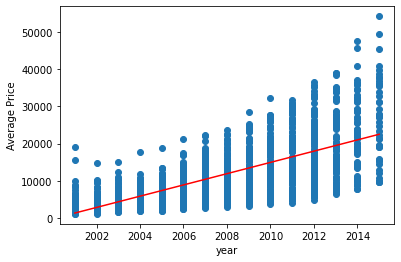

The price increased year by year is: [1509.09382534]


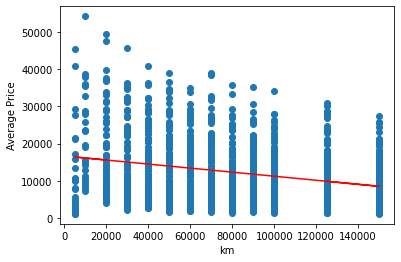

The price as km increased is: [-0.05425151]


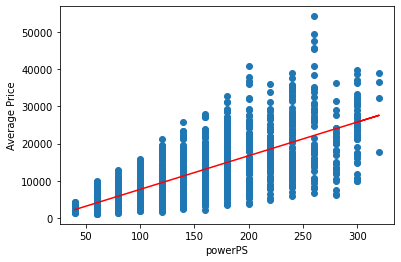

The price as powerPS increased is: [90.33080719]


numpy.ndarray

In [128]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape


# Create an instance of a linear regression model and fit it to the data with the fit() function:


# your code.....



# YEAR VS AVGPRICE
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y) 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)

# Predict a Response and print it:
y_pred = model.predict(x)

plt.scatter(x, y)
plt.xlabel("year")
plt.ylabel("Average Price")
plt.plot(x,y_pred,color="red")
plt.show()

print( "The price increased year by year is:", *model.coef_ )




# km VS AVGPRICE
model = LinearRegression().fit(x1, y1) 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x1, y1)

# Predict a Response and print it:
y_pred = model.predict(x1)

plt.scatter(x1, y1)
plt.xlabel("km")
plt.ylabel("Average Price")
plt.plot(x1,y_pred,color="red")
plt.show()

print( "The price as km increased is:", *model.coef_ )



# powerps VS AVGPRICE

model = LinearRegression().fit(x2, y2) 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x2, y2)

# Predict a Response and print it:
y_pred = model.predict(x2)

plt.scatter(x2, y2)
plt.xlabel("powerPS")
plt.ylabel("Average Price")
plt.plot(x2,y_pred,color="red")
plt.show()

print( "The price as powerPS increased is:", *model.coef_ )

type(x)

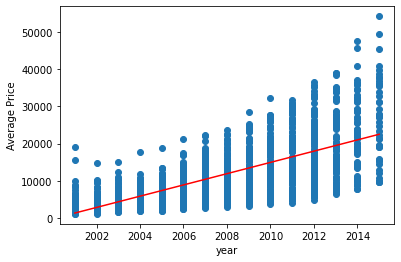

The price increased year by year is: 1509.0938253351871


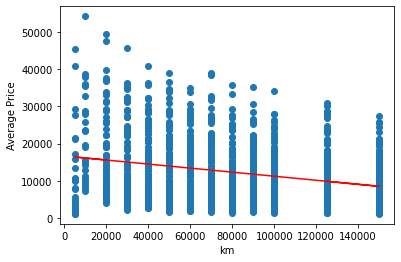

The price as km  is: -0.05425151330972587


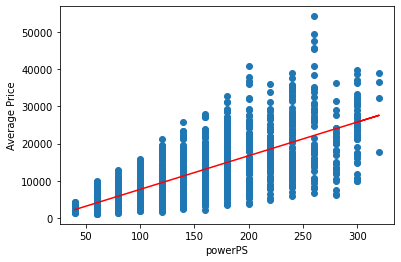

The price as km  is: 90.33080718820203


In [131]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

# YEAR VS AVGPRICE

# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)
 
# Total number of values
n = len(x)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
 
 # Plotting Values and Regression Line
ya = c + m * x
plt.plot(x, ya,color="red")
plt.xlabel("year")
plt.ylabel("Average Price")
plt.scatter(x,y)
plt.show()

print( "The price increased year by year is:", *m)




# km VS AVGPRICE
# Mean X and Y
mean_x1 = np.mean(x1)
mean_y1 = np.mean(y1)
 
# Total number of values
n = len(x1)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (x1[i] - mean_x1) * (y1[i] - mean_y1)
    denom += (x1[i] - mean_x1) ** 2
    m = numer / denom
    c = mean_y1 - (m * mean_x1)
 
 # Plotting Values and Regression Line
ya1 = c + m * x1
plt.plot(x1, ya1,color="red")
plt.xlabel("km")
plt.ylabel("Average Price")
plt.scatter(x1,y1)
plt.show()

print( "The price as km  is:", *m)



## powerps VS AVGPRICE
# Mean X and Y
mean_x2 = np.mean(x2)
mean_y2 = np.mean(y2)
 
# Total number of values
n = len(x2)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (x2[i] - mean_x2) * (y2[i] - mean_y2)
    denom += (x2[i] - mean_x2) ** 2
    m = numer / denom
    c = mean_y2 - (m * mean_x2)
 
 # Plotting Values and Regression Line
ya2 = c + m * x2
plt.plot(x2, ya2,color="red")
plt.xlabel("powerPS")
plt.ylabel("Average Price")
plt.scatter(x2,y2)
plt.show()

print( "The price as km  is:", *m)



In [ ]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....

#SEE CODE BEFORE

In [ ]:
# linear regression with linregress (estimate price from power)

# your code.....

#SEE CODE BEFORE

In [ ]:
# linear regression with linregress (estimate price from km)

# your code...

#SEE CODE BEFORE

In [ ]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......

#markdown below

As we can see in the first case the correlation coefficients are:

- r= 0.6767043169095441
- r=  -0.25728674299884985
- r=  0.708550031526397

So the powerPS is the bewst one!

In [143]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
import statsmodels.api as sm
x = df[['year','powerPS']]
y = df['avgPrice']


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -2661196.7867490062
Coefficients: 
 [1325.2284004    80.43004469]
                            OLS Regression Results                            
Dep. Variable:               avgPrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     3642.
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:02:22   Log-Likelihood:                -12378.
No. Observations:                1297   AIC:                         2.476e+04
Df Residuals:                    1294   BIC:                         2.478e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------